In [1]:
from datetime import datetime
import matplotlib.pyplot as pyplot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 定数
TEST_SIZE = 0.2
RANDOM_STATE = 123
MIN_SAMPLES_LEAF = 10

% matplotlib inline

In [2]:
# レース結果のCSVファイルを取り込む(約3年分)
import_df = pd.read_csv('taraining_data_15-17.csv')
import_df.head(6)

,RACE_ID,RACE_DATE,RACE_COURSE,COURSE,WEATHER,TRACK,DISTANCE,PRIZE1,HORSE_NAME,FRAME,...,DISTANCE_RANK_2,DISTANCE_RANK_3,DISTANCE_RANK_4,DISTANCE_RANK_5,STD_DEV,RACE_TIME,AVG_RACE_TIME,RANK,POPULARITY,ODDS
0,1506010101,2015/01/04,15,2,1,1,1200,500,エマージングウルフ,8,...,0,0,0,0,37.849496,75.3,73.290352,12,16,249.3
1,1506010101,2015/01/04,15,2,1,1,1200,500,エメラルドビーム,6,...,0,1,0,0,42.686365,74.5,73.290352,7,4,8.2
2,1506010101,2015/01/04,15,2,1,1,1200,500,カイマノア,3,...,1,0,2,0,49.941668,73.3,73.290352,1,1,2.4
3,1506010101,2015/01/04,15,2,1,1,1200,500,ゴールドエッグ,2,...,1,0,1,0,48.732451,73.5,73.290352,2,3,7.0
4,1506010101,2015/01/04,15,2,1,1,1200,500,ジュエルアラモード,1,...,0,0,0,0,46.314017,73.9,73.290352,3,8,26.0
5,1506010101,2015/01/04,15,2,1,1,1200,500,テイア,3,...,0,0,0,0,40.267931,74.9,73.290352,8,12,112.3


In [3]:
# CSVファイルの確認
print('Total: {}件'.format(len(import_df.index)))
import_df['STD_DEV'].value_counts()

Total: 140275件


 55.987754    65
 54.698169    64
 57.875360    60
 45.709408    60
 56.604483    60
 57.239922    59
 56.592363    58
 49.941668    56
 57.801580    56
 52.156417    55
 45.802036    55
 54.778537    54
 54.173928    53
 60.417112    52
 48.732451    51
 52.964711    51
 46.314017    50
 59.781674    50
 54.062731    49
 51.150885    49
 51.624955    49
 58.510798    49
 52.982141    49
 51.755494    48
 47.072912    48
 51.520979    48
 52.360103    48
 53.660735    47
 47.708350    47
 49.337060    47
              ..
 42.519901     1
 46.600561     1
 62.244057     1
 15.855983     1
 40.503640     1
 29.993754     1
 34.048131     1
 40.224552     1
 43.053131     1
 66.852802     1
 25.856269     1
 27.667201     1
 57.011247     1
 70.375425     1
 59.925876     1
 27.673117     1
 36.930498     1
-5.706180      1
 21.312117     1
-17.424378     1
 42.399988     1
 32.236449     1
 66.771552     1
 52.238812     1
 26.398486     1
 46.043177     1
 24.750097     1
 27.007953    

In [4]:
# 学習・テストデータの作成
training_df = pd.DataFrame()

# １．目的変数の設定
training_df['STD_DEV'] = import_df['STD_DEV']

# ２．説明変数の設定
# training_df['RACE_ID'] = import_df['RACE_ID']
training_df['RACE_DATE'] = import_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
training_df['RACE_COURSE'] = import_df['RACE_COURSE']
training_df['COURSE'] = import_df['COURSE']
# training_df['WEATHER'] = import_df['WEATHER']
# training_df['TRACK'] = import_df['TRACK']
training_df['DISTANCE'] = import_df['DISTANCE']
training_df['PRIZE1'] = import_df['PRIZE1']
# training_df['HORSE_NAME'] = import_df['HORSE_NAME']
training_df['FRAME'] = import_df['FRAME']
training_df['NUM'] = import_df['NUM']
training_df['GENDER'] = import_df['GENDER']
training_df['AGE'] = import_df['AGE']
training_df['CNT'] = import_df['CNT']
training_df['RANK_1'] = import_df['RANK_1']
training_df['RANK_2'] = import_df['RANK_2']
training_df['RANK_3'] = import_df['RANK_3']
training_df['RANK_4'] = import_df['RANK_4']
training_df['RANK_5'] = import_df['RANK_5']
training_df['RACE_COURSE_CNT'] = import_df['RACE_COURSE_CNT']
training_df['RACE_COURSE_RANK_1'] = import_df['RACE_COURSE_RANK_1']
training_df['RACE_COURSE_RANK_2'] = import_df['RACE_COURSE_RANK_2']
training_df['RACE_COURSE_RANK_3'] = import_df['RACE_COURSE_RANK_3']
training_df['RACE_COURSE_RANK_4'] = import_df['RACE_COURSE_RANK_4']
training_df['RACE_COURSE_RANK_5'] = import_df['RACE_COURSE_RANK_5']
training_df['COURSE_CNT'] = import_df['COURSE_CNT']
training_df['COURSE_RANK_1'] = import_df['COURSE_RANK_1']
training_df['COURSE_RANK_2'] = import_df['COURSE_RANK_2']
training_df['COURSE_RANK_3'] = import_df['COURSE_RANK_3']
training_df['COURSE_RANK_4'] = import_df['COURSE_RANK_4']
training_df['COURSE_RANK_5'] = import_df['COURSE_RANK_5']
training_df['DISTANCE_CNT'] = import_df['DISTANCE_CNT']
training_df['DISTANCE_RANK_1'] = import_df['DISTANCE_RANK_1']
training_df['DISTANCE_RANK_2'] = import_df['DISTANCE_RANK_2']
training_df['DISTANCE_RANK_3'] = import_df['DISTANCE_RANK_3']
training_df['DISTANCE_RANK_4'] = import_df['DISTANCE_RANK_4']
training_df['DISTANCE_RANK_5'] = import_df['DISTANCE_RANK_5']

# ３．テストデータで学習
feature = training_df.ix[:, 'RACE_DATE':]
correct = training_df['STD_DEV']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# モデルの作成
rfc = RandomForestRegressor(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# ４．モデルの評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
# 予測値を計算
y_train_pred = rfc.predict(training_feature)
y_test_pred = rfc.predict(test_feature)
# 平均二乗誤差(MSE)の計算
print('MSE train : %.3f, test : %.3f'
      % (mean_squared_error(traininig_correct, y_train_pred), mean_squared_error(test_correct, y_test_pred)))
# 決定係数(R2)の計算
print('R2 train : %.3f, test : %.3f'
      % (r2_score(traininig_correct, y_train_pred), r2_score(test_correct, y_test_pred)))

学習: 112220件 (80.00%)
テスト: 28055件 (20.00%)


MSE train : 36.234, test : 50.807
R2 train : 0.636, test : 0.496


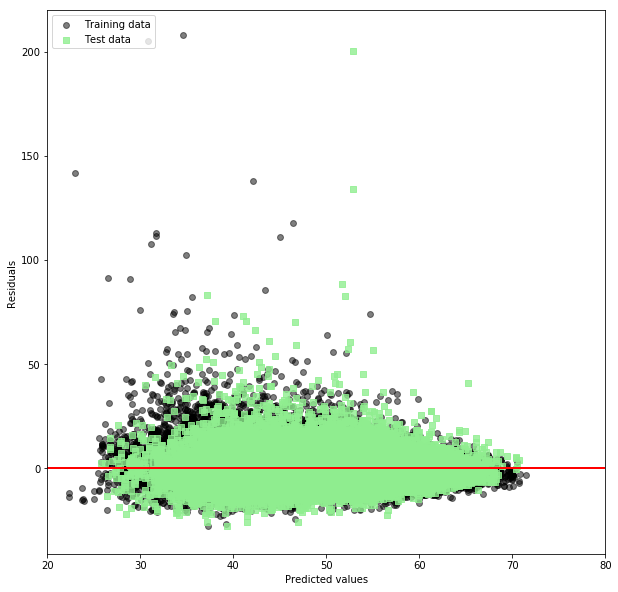

In [5]:
# 残差を可視化
pyplot.figure(figsize = (10, 10))
pyplot.scatter(y_train_pred, y_train_pred - traininig_correct, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
pyplot.scatter(y_test_pred, y_test_pred - test_correct, c = 'lightgreen', marker = 's', s = 35, alpha = 0.8, label = 'Test data')
pyplot.xlabel('Predicted values')
pyplot.ylabel('Residuals')
pyplot.legend(loc = 'upper left')
pyplot.hlines(y = 0, xmin = 20, xmax = 80, lw = 2, color = 'red')
pyplot.xlim([20, 80])
pyplot.show()

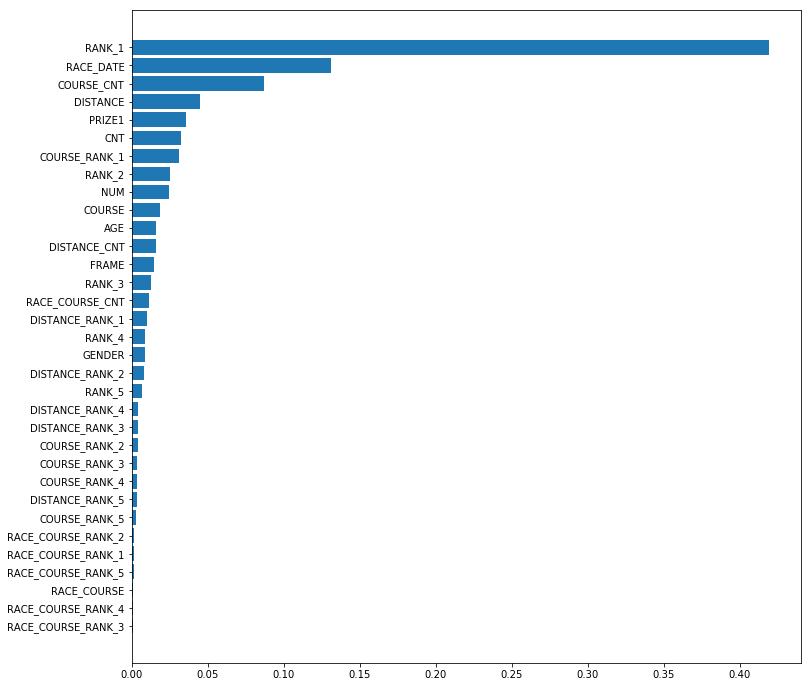

In [6]:
# 作成したモデルの相関度が高い項目を表示
values, names = zip(*sorted(zip(rfc.feature_importances_, feature.columns)))

pyplot.figure(figsize=(12, 12))
pyplot.barh(range(len(names)), values, align='center')
pyplot.yticks(range(len(names)), names)
pyplot.show()

In [27]:
# レースファイルの取りこみ
import_prediction_df = pd.read_csv('yosou_1705050211.csv')

# 予想データの作成
prediction_df = pd.DataFrame()

# 説明変数の設定
# prediction_df['RACE_ID'] = import_prediction_df['RACE_ID']
prediction_df['RACE_DATE'] = import_prediction_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
prediction_df['RACE_COURSE'] = import_prediction_df['RACE_COURSE']
prediction_df['COURSE'] = import_prediction_df['COURSE']
# prediction_df['WEATHER'] = import_prediction_df['WEATHER']
# prediction_df['TRACK'] = import_prediction_df['TRACK']
prediction_df['DISTANCE'] = import_prediction_df['DISTANCE']
prediction_df['PRIZE1'] = import_prediction_df['PRIZE1']
# prediction_df['HORSE_NAME'] = import_prediction_df['HORSE_NAME']
prediction_df['FRAME'] = import_prediction_df['FRAME']
prediction_df['NUM'] = import_prediction_df['NUM']
prediction_df['GENDER'] = import_prediction_df['GENDER']
prediction_df['AGE'] = import_prediction_df['AGE']
prediction_df['CNT'] = import_prediction_df['CNT']
prediction_df['RANK_1'] = import_prediction_df['RANK_1']
prediction_df['RANK_2'] = import_prediction_df['RANK_2']
prediction_df['RANK_3'] = import_prediction_df['RANK_3']
prediction_df['RANK_4'] = import_prediction_df['RANK_4']
prediction_df['RANK_5'] = import_prediction_df['RANK_5']
prediction_df['RACE_COURSE_CNT'] = import_prediction_df['RACE_COURSE_CNT']
prediction_df['RACE_COURSE_RANK_1'] = import_prediction_df['RACE_COURSE_RANK_1']
prediction_df['RACE_COURSE_RANK_2'] = import_prediction_df['RACE_COURSE_RANK_2']
prediction_df['RACE_COURSE_RANK_3'] = import_prediction_df['RACE_COURSE_RANK_3']
prediction_df['RACE_COURSE_RANK_4'] = import_prediction_df['RACE_COURSE_RANK_4']
prediction_df['RACE_COURSE_RANK_5'] = import_prediction_df['RACE_COURSE_RANK_5']
prediction_df['COURSE_CNT'] = import_prediction_df['COURSE_CNT']
prediction_df['COURSE_RANK_1'] = import_prediction_df['COURSE_RANK_1']
prediction_df['COURSE_RANK_2'] = import_prediction_df['COURSE_RANK_2']
prediction_df['COURSE_RANK_3'] = import_prediction_df['COURSE_RANK_3']
prediction_df['COURSE_RANK_4'] = import_prediction_df['COURSE_RANK_4']
prediction_df['COURSE_RANK_5'] = import_prediction_df['COURSE_RANK_5']
prediction_df['DISTANCE_CNT'] = import_prediction_df['DISTANCE_CNT']
prediction_df['DISTANCE_RANK_1'] = import_prediction_df['DISTANCE_RANK_1']
prediction_df['DISTANCE_RANK_2'] = import_prediction_df['DISTANCE_RANK_2']
prediction_df['DISTANCE_RANK_3'] = import_prediction_df['DISTANCE_RANK_3']
prediction_df['DISTANCE_RANK_4'] = import_prediction_df['DISTANCE_RANK_4']
prediction_df['DISTANCE_RANK_5'] = import_prediction_df['DISTANCE_RANK_5']

prediction_pred = rfc.predict(prediction_df.ix[:, 'RACE_DATE':])
for i, pred in enumerate(prediction_pred):
    print("{}\t{}\t{}".format(import_prediction_df['NUM'][i], import_prediction_df['HORSE_NAME'][i], pred))

1	セダブリランテス	39.66425210662721
2	マイネルサージュ	30.113198901085646
3	デニムアンドルビー	37.01380210804561
4	スワーヴリチャード	37.75184824109742
5	トウシンモンステラ	32.35708822470053
6	プレストウィック	29.517986177866675
7	ソールインパクト	36.486347777612714
8	カレンミロティック	36.486347777612714
9	シホウ	36.486347777612714
10	サラトガスピリット	30.685537627894245
11	アルバート	32.88454255513343
12	トルークマクト	30.04544050829957
13	ハッピーモーメント	36.486347777612714
14	レコンダイト	36.486347777612714
15	ヒットザターゲット	33.02869402346476
16	カムフィー	36.486347777612714


In [28]:
# レースファイルの取りこみ
import_prediction_df = pd.read_csv('yosou_1708050211.csv')

# 予想データの作成
prediction_df = pd.DataFrame()

# 説明変数の設定
# prediction_df['RACE_ID'] = import_prediction_df['RACE_ID']
prediction_df['RACE_DATE'] = import_prediction_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
prediction_df['RACE_COURSE'] = import_prediction_df['RACE_COURSE']
prediction_df['COURSE'] = import_prediction_df['COURSE']
# prediction_df['WEATHER'] = import_prediction_df['WEATHER']
# prediction_df['TRACK'] = import_prediction_df['TRACK']
prediction_df['DISTANCE'] = import_prediction_df['DISTANCE']
prediction_df['PRIZE1'] = import_prediction_df['PRIZE1']
# prediction_df['HORSE_NAME'] = import_prediction_df['HORSE_NAME']
prediction_df['FRAME'] = import_prediction_df['FRAME']
prediction_df['NUM'] = import_prediction_df['NUM']
prediction_df['GENDER'] = import_prediction_df['GENDER']
prediction_df['AGE'] = import_prediction_df['AGE']
prediction_df['CNT'] = import_prediction_df['CNT']
prediction_df['RANK_1'] = import_prediction_df['RANK_1']
prediction_df['RANK_2'] = import_prediction_df['RANK_2']
prediction_df['RANK_3'] = import_prediction_df['RANK_3']
prediction_df['RANK_4'] = import_prediction_df['RANK_4']
prediction_df['RANK_5'] = import_prediction_df['RANK_5']
prediction_df['RACE_COURSE_CNT'] = import_prediction_df['RACE_COURSE_CNT']
prediction_df['RACE_COURSE_RANK_1'] = import_prediction_df['RACE_COURSE_RANK_1']
prediction_df['RACE_COURSE_RANK_2'] = import_prediction_df['RACE_COURSE_RANK_2']
prediction_df['RACE_COURSE_RANK_3'] = import_prediction_df['RACE_COURSE_RANK_3']
prediction_df['RACE_COURSE_RANK_4'] = import_prediction_df['RACE_COURSE_RANK_4']
prediction_df['RACE_COURSE_RANK_5'] = import_prediction_df['RACE_COURSE_RANK_5']
prediction_df['COURSE_CNT'] = import_prediction_df['COURSE_CNT']
prediction_df['COURSE_RANK_1'] = import_prediction_df['COURSE_RANK_1']
prediction_df['COURSE_RANK_2'] = import_prediction_df['COURSE_RANK_2']
prediction_df['COURSE_RANK_3'] = import_prediction_df['COURSE_RANK_3']
prediction_df['COURSE_RANK_4'] = import_prediction_df['COURSE_RANK_4']
prediction_df['COURSE_RANK_5'] = import_prediction_df['COURSE_RANK_5']
prediction_df['DISTANCE_CNT'] = import_prediction_df['DISTANCE_CNT']
prediction_df['DISTANCE_RANK_1'] = import_prediction_df['DISTANCE_RANK_1']
prediction_df['DISTANCE_RANK_2'] = import_prediction_df['DISTANCE_RANK_2']
prediction_df['DISTANCE_RANK_3'] = import_prediction_df['DISTANCE_RANK_3']
prediction_df['DISTANCE_RANK_4'] = import_prediction_df['DISTANCE_RANK_4']
prediction_df['DISTANCE_RANK_5'] = import_prediction_df['DISTANCE_RANK_5']

prediction_pred = rfc.predict(prediction_df.ix[:, 'RACE_DATE':])
for i, pred in enumerate(prediction_pred):
    print("{}\t{}\t{}".format(import_prediction_df['NUM'][i], import_prediction_df['HORSE_NAME'][i], pred))

1	モルトベーネ	65.7243921943284
2	サルサディオーネ	63.036697117178804
3	タガノヴェリテ	66.74476838104943
5	アスカノロマン	64.78322066385003
6	タガノディグオ	62.41162295623117
7	リーゼントロック	63.83215225694041
8	モンドクラッセ	64.89781966144429
9	シャイニービーム	65.183804537062
10	ルールソヴァール	64.9667912013841
11	ローズプリンスダム	64.51018778301675
12	キングズガード	63.51494764418578
13	マイネルクロップ	63.35138039832534
14	タムロミラクル	65.63952537798863
15	エピカリス	63.29109138486267
16	テイエムジンソク	65.02115705887607


In [29]:
# レースファイルの取りこみ
import_prediction_df = pd.read_csv('yosou_1705050311.csv')

# 予想データの作成
prediction_df = pd.DataFrame()

# 説明変数の設定
# prediction_df['RACE_ID'] = import_prediction_df['RACE_ID']
prediction_df['RACE_DATE'] = import_prediction_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
prediction_df['RACE_COURSE'] = import_prediction_df['RACE_COURSE']
prediction_df['COURSE'] = import_prediction_df['COURSE']
# prediction_df['WEATHER'] = import_prediction_df['WEATHER']
# prediction_df['TRACK'] = import_prediction_df['TRACK']
prediction_df['DISTANCE'] = import_prediction_df['DISTANCE']
prediction_df['PRIZE1'] = import_prediction_df['PRIZE1']
# prediction_df['HORSE_NAME'] = import_prediction_df['HORSE_NAME']
prediction_df['FRAME'] = import_prediction_df['FRAME']
prediction_df['NUM'] = import_prediction_df['NUM']
prediction_df['GENDER'] = import_prediction_df['GENDER']
prediction_df['AGE'] = import_prediction_df['AGE']
prediction_df['CNT'] = import_prediction_df['CNT']
prediction_df['RANK_1'] = import_prediction_df['RANK_1']
prediction_df['RANK_2'] = import_prediction_df['RANK_2']
prediction_df['RANK_3'] = import_prediction_df['RANK_3']
prediction_df['RANK_4'] = import_prediction_df['RANK_4']
prediction_df['RANK_5'] = import_prediction_df['RANK_5']
prediction_df['RACE_COURSE_CNT'] = import_prediction_df['RACE_COURSE_CNT']
prediction_df['RACE_COURSE_RANK_1'] = import_prediction_df['RACE_COURSE_RANK_1']
prediction_df['RACE_COURSE_RANK_2'] = import_prediction_df['RACE_COURSE_RANK_2']
prediction_df['RACE_COURSE_RANK_3'] = import_prediction_df['RACE_COURSE_RANK_3']
prediction_df['RACE_COURSE_RANK_4'] = import_prediction_df['RACE_COURSE_RANK_4']
prediction_df['RACE_COURSE_RANK_5'] = import_prediction_df['RACE_COURSE_RANK_5']
prediction_df['COURSE_CNT'] = import_prediction_df['COURSE_CNT']
prediction_df['COURSE_RANK_1'] = import_prediction_df['COURSE_RANK_1']
prediction_df['COURSE_RANK_2'] = import_prediction_df['COURSE_RANK_2']
prediction_df['COURSE_RANK_3'] = import_prediction_df['COURSE_RANK_3']
prediction_df['COURSE_RANK_4'] = import_prediction_df['COURSE_RANK_4']
prediction_df['COURSE_RANK_5'] = import_prediction_df['COURSE_RANK_5']
prediction_df['DISTANCE_CNT'] = import_prediction_df['DISTANCE_CNT']
prediction_df['DISTANCE_RANK_1'] = import_prediction_df['DISTANCE_RANK_1']
prediction_df['DISTANCE_RANK_2'] = import_prediction_df['DISTANCE_RANK_2']
prediction_df['DISTANCE_RANK_3'] = import_prediction_df['DISTANCE_RANK_3']
prediction_df['DISTANCE_RANK_4'] = import_prediction_df['DISTANCE_RANK_4']
prediction_df['DISTANCE_RANK_5'] = import_prediction_df['DISTANCE_RANK_5']

prediction_pred = rfc.predict(prediction_df.ix[:, 'RACE_DATE':])
for i, pred in enumerate(prediction_pred):
    print("{}\t{}\t{}".format(import_prediction_df['NUM'][i], import_prediction_df['HORSE_NAME'][i], pred))

1	クインズサターン	63.59262634631434
2	ゴールデンバローズ	64.2107214345076
3	ロワジャルダン	66.19590374718362
4	チャーリーブレイヴ	63.10316757293974
5	メイショウウタゲ	65.00818919851149
6	サンライズノヴァ	64.71964735261454
7	アキトクレッセント	63.38502578983126
8	ノンコノユメ	63.949526485233534
9	サンライズソア	66.8766171193004
10	ピオネロ	66.33973587849773
11	ラストダンサー	63.77546573909075
12	ベストウォーリア	64.93961908517193
13	インカンテーション	65.69474501012071
14	モーニン	63.56690853507886
15	ブラゾンドゥリス	64.95865634944641
16	カフジテイク	66.60577536464437


In [55]:
# レースファイルの取りこみ
import_prediction_df = pd.read_csv('yosou_201711.csv')

# 予想データの作成
prediction_df = pd.DataFrame()

# 説明変数の設定
prediction_df['RACE_ID'] = import_prediction_df['RACE_ID']
prediction_df['RACE_DATE'] = import_prediction_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
prediction_df['RACE_COURSE'] = import_prediction_df['RACE_COURSE']
prediction_df['COURSE'] = import_prediction_df['COURSE']
# prediction_df['WEATHER'] = import_prediction_df['WEATHER']
# prediction_df['TRACK'] = import_prediction_df['TRACK']
prediction_df['DISTANCE'] = import_prediction_df['DISTANCE']
prediction_df['PRIZE1'] = import_prediction_df['PRIZE1']
# prediction_df['HORSE_NAME'] = import_prediction_df['HORSE_NAME']
prediction_df['FRAME'] = import_prediction_df['FRAME']
prediction_df['NUM'] = import_prediction_df['NUM']
prediction_df['GENDER'] = import_prediction_df['GENDER']
prediction_df['AGE'] = import_prediction_df['AGE']
prediction_df['CNT'] = import_prediction_df['CNT']
prediction_df['RANK_1'] = import_prediction_df['RANK_1']
prediction_df['RANK_2'] = import_prediction_df['RANK_2']
prediction_df['RANK_3'] = import_prediction_df['RANK_3']
prediction_df['RANK_4'] = import_prediction_df['RANK_4']
prediction_df['RANK_5'] = import_prediction_df['RANK_5']
prediction_df['RACE_COURSE_CNT'] = import_prediction_df['RACE_COURSE_CNT']
prediction_df['RACE_COURSE_RANK_1'] = import_prediction_df['RACE_COURSE_RANK_1']
prediction_df['RACE_COURSE_RANK_2'] = import_prediction_df['RACE_COURSE_RANK_2']
prediction_df['RACE_COURSE_RANK_3'] = import_prediction_df['RACE_COURSE_RANK_3']
prediction_df['RACE_COURSE_RANK_4'] = import_prediction_df['RACE_COURSE_RANK_4']
prediction_df['RACE_COURSE_RANK_5'] = import_prediction_df['RACE_COURSE_RANK_5']
prediction_df['COURSE_CNT'] = import_prediction_df['COURSE_CNT']
prediction_df['COURSE_RANK_1'] = import_prediction_df['COURSE_RANK_1']
prediction_df['COURSE_RANK_2'] = import_prediction_df['COURSE_RANK_2']
prediction_df['COURSE_RANK_3'] = import_prediction_df['COURSE_RANK_3']
prediction_df['COURSE_RANK_4'] = import_prediction_df['COURSE_RANK_4']
prediction_df['COURSE_RANK_5'] = import_prediction_df['COURSE_RANK_5']
prediction_df['DISTANCE_CNT'] = import_prediction_df['DISTANCE_CNT']
prediction_df['DISTANCE_RANK_1'] = import_prediction_df['DISTANCE_RANK_1']
prediction_df['DISTANCE_RANK_2'] = import_prediction_df['DISTANCE_RANK_2']
prediction_df['DISTANCE_RANK_3'] = import_prediction_df['DISTANCE_RANK_3']
prediction_df['DISTANCE_RANK_4'] = import_prediction_df['DISTANCE_RANK_4']
prediction_df['DISTANCE_RANK_5'] = import_prediction_df['DISTANCE_RANK_5']

prediction_pred = rfc.predict(prediction_df.ix[:, 'RACE_DATE':])


In [63]:
result_feature = prediction_df.copy()
result_feature['HORSE_NAME'] = pd.Series(import_prediction_df['HORSE_NAME'], index=result_feature.index)
result_feature['STD_DEV'] = pd.Series(import_prediction_df['STD_DEV'], index=result_feature.index)
result_feature['RANK'] = pd.Series(import_prediction_df['RANK'], index=result_feature.index)
result_feature['POPULARITY'] = pd.Series(import_prediction_df['POPULARITY'], index=result_feature.index)
result_feature['ODDS'] = pd.Series(import_prediction_df['ODDS'], index=result_feature.index)
result_feature['result'] = pd.Series(prediction_pred, index=result_feature.index)
result_feature['result_rank'] = result_feature.groupby('RACE_ID')['result'].rank(ascending=False, method='min')
result_feature = result_feature.sort_values(by=["RACE_ID", "result_rank"], ascending=True)
result_feature[result_feature['result_rank'] == 1].to_csv("201711_result1.csv")
# for result in result_feature[result_feature['result_rank'] == 1]:
    